## project_nutrients_review_negative

In [37]:
import numpy as np

In [38]:
# project_nutrients_review_negative.csv
import pandas as pd
df_review_negative = pd.read_csv('../datasets/reviews_data/final_all_preprocess_negative.csv')

In [39]:
df_review_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4821 non-null   int64  
 1   product_name     4821 non-null   object 
 2   review_date      4821 non-null   object 
 3   review_content   4821 non-null   object 
 4   review_star      4821 non-null   float64
 5   review_writer    4821 non-null   object 
 6   reveiw_replaced  4821 non-null   object 
 7   replaced_review  4681 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 301.4+ KB


In [40]:
df_review_negative = df_review_negative.dropna()

### LDA 분석

##### 문장 벡터화

In [41]:
from gensim.corpora import Dictionary

In [42]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
# df_review_negative['replaced_review'] = df_review_negative['replaced_review'].astype(str)

In [43]:
dictionary = Dictionary(df_review_negative[['replaced_review']].values)
dictionary

In [44]:
dictionary.doc2bow(df_review_negative[['replaced_review']].values[3])

[(3, 1)]

In [45]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_negative[['replaced_review']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [46]:
df_review_negative['문장벡터화'] = corpus_list

In [47]:
df_review_negative.columns

Index(['Unnamed: 0', 'product_name', 'review_date', 'review_content',
       'review_star', 'review_writer', 'reveiw_replaced', 'replaced_review',
       '문장벡터화'],
      dtype='object')

##### 토픽 잡기
- review_negative.csv 토픽 분석
- 토픽 수 9 <<<<<<< 변경하기

In [48]:
from gensim.models import LdaModel

In [49]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=4)

In [50]:
lda_model.print_topics(num_words=4)

[(0, '0.335*"성능" + 0.062*"포장 상태" + 0.011*"성능 구매" + 0.006*"가격 구매"'),
 (1, '0.317*"가격" + 0.101*"성능 기한" + 0.021*"기한 포장 상태" + 0.010*"가격 효과"'),
 (2, '0.005*"성능 기한" + 0.004*"성능 복용" + 0.003*"성능 항상" + 0.003*"성능 가성"'),
 (3, '0.026*"가격 안" + 0.008*"효과" + 0.007*"가격 배송" + 0.007*"기한"')]

##### 최적에 토픽 단어 수

In [51]:
sentences = df_review_negative['replaced_review']
sentences

0             기한 생리 증후군 주문 좋다 중단 전이 무지 보라 지유 복용 생각 다시 제대로
1                                           효능 복용 정확하다 상품
2       성능 별로 감마 리놀렌산 효능 어떻다 제약회사 제품 여성 갱년기 효과 유독 상품 가...
3                                          성능 가격 효과 먹다 차이
4                                        가격 안 라보 여자 좋다 식품
                              ...                        
4816                                    성능 우리 가족 가격 부담스럽다
4817                                              성능 안 좋다
4818                                    성능 제품 섭취 한지 얼마 모느
4819                             성능 별로 기한 박스 피로 회복 안되다 느낌
4820                                      성능 별로 호불호 먹기 포기
Name: replaced_review, Length: 4681, dtype: object

In [52]:
type(sentences)

pandas.core.series.Series

In [53]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [54]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['기한',
  '생리',
  '증후군',
  '주문',
  '좋다',
  '중단',
  '전이',
  '무지',
  '보라',
  '지유',
  '복용',
  '생각',
  '다시',
  '제대로'],
 ['효능', '복용', '정확하다', '상품'],
 ['성능',
  '별로',
  '감마',
  '리놀렌산',
  '효능',
  '어떻다',
  '제약회사',
  '제품',
  '여성',
  '갱년기',
  '효과',
  '유독',
  '상품',
  '가격',
  '회사',
  '비교',
  '함유',
  '개월',
  '거기',
  '캡슐',
  '판매',
  '하다',
  '구입'],
 ['성능', '가격', '효과', '먹다', '차이'],
 ['가격', '안', '라보', '여자', '좋다', '식품'],
 ['성능', '크기', '커서', '넘김'],
 ['성능', '버니', '부담스럽다', '가격'],
 ['성능', '별로', '기한', '효과', '전혀'],
 ['혈액',
  '순환',
  '도움',
  '감마',
  '리놀렌산',
  '달맞이',
  '자유',
  '구입',
  '복용',
  '크게',
  '효과',
  '보지',
  '의아',
  '보고',
  '없다',
  '제품',
  '교체',
  '약간',
  '절임',
  '개선',
  '안될런'],
 ['성능', '생리', '주기'],
 ['성능', '가격'],
 ['가격', '브리', '캐나다', '감마', '리놀렌산', '보라', '오일', '달맞이꽃', '자유'],
 ['가격', '마눌', '달라', '고해', '아니다'],
 ['가격', '신랑', '다이어트', '끼니', '양제', '주문', '비싸다', '배송'],
 ['부작용', '안나', '는걸', '다행', '야하다', '가요'],
 ['성능', '기한', '갱년기', '증상', '달맞이꽃', '자유', '성분', '탁월하다', '주문', '효과', '있다', '복용'],
 ['가격', '안', '뉴질랜드', '시간

In [23]:
preprocessed_sentences = morphs_list

In [24]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [25]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.6466389157179802

In [26]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-8.072997146389024

In [27]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [28]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.471091,-8.015748
1,0.599721,-8.182158
2,0.665217,-8.343789
3,0.674024,-8.541870
4,0.648791,-8.642542
5,0.610714,-10.569165
6,0.588479,-12.198984
7,0.566421,-12.938777
8,0.601759,-13.637428


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

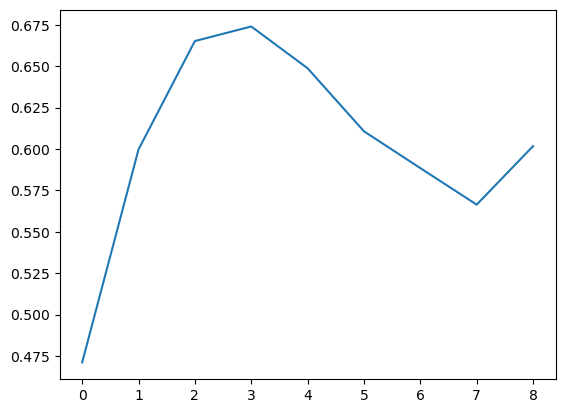

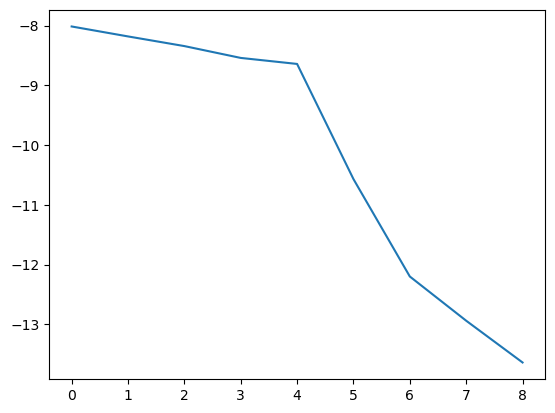

In [30]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [31]:
# %pip install pyLDAvis

In [34]:
word_count_in_dictionary = len(dictionary.token2id)
print("dictionary 객체의 단어 수:", word_count_in_dictionary)

dictionary 객체의 단어 수: 4492


In [35]:
word_count_in_corpus = sum(len(doc) for doc in corpus_list)
print("corpus_list의 전체 단어 수:", word_count_in_corpus)

corpus_list의 전체 단어 수: 4681


In [36]:
if word_count_in_dictionary == word_count_in_corpus:
    print("dictionary와 corpus_list의 단어 수가 일치합니다.")
else:
    print("주의: dictionary와 corpus_list의 단어 수가 일치하지 않습니다.")

주의: dictionary와 corpus_list의 단어 수가 일치하지 않습니다.


In [32]:
import pyLDAvis.gensim_models

In [33]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

IndexError: index 2850 is out of bounds for axis 1 with size 2850

In [67]:
pyLDAvis.display(result_visualized)

In [68]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, '../project_nutrients_review_negative_result_visualized.html')